# Statistical Analysis - Milestone-2

### Distributions of numeric variables

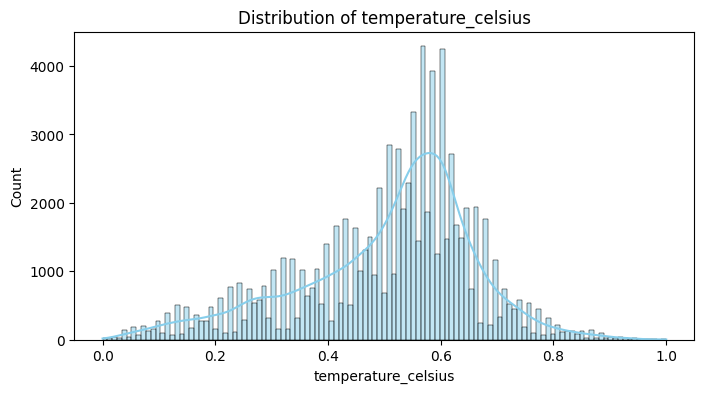

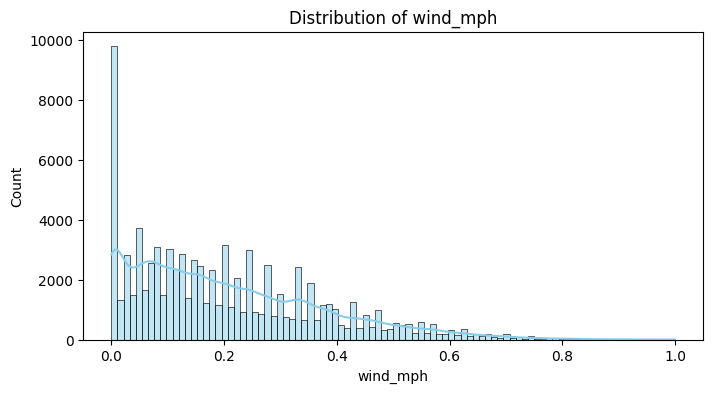

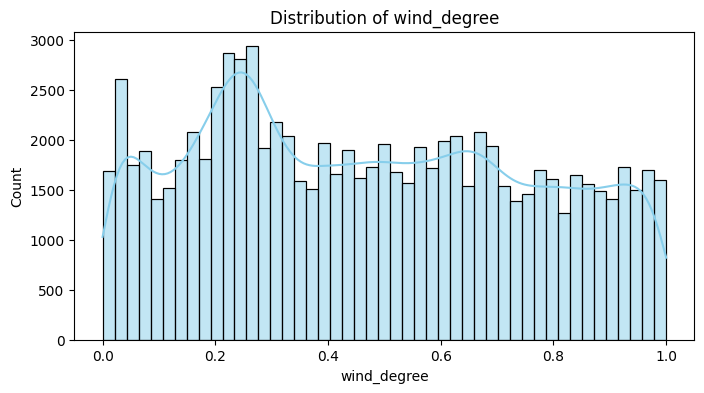

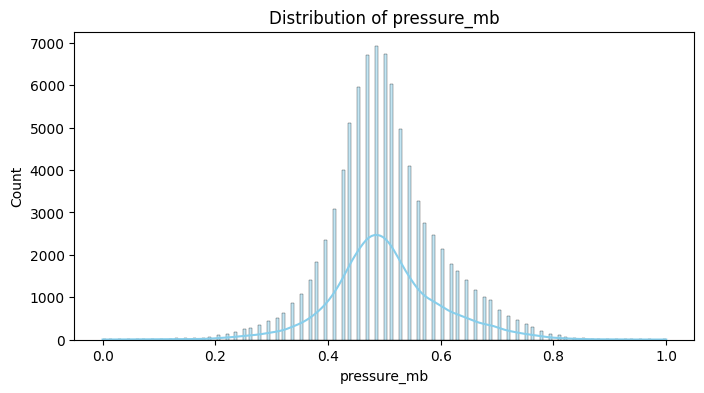

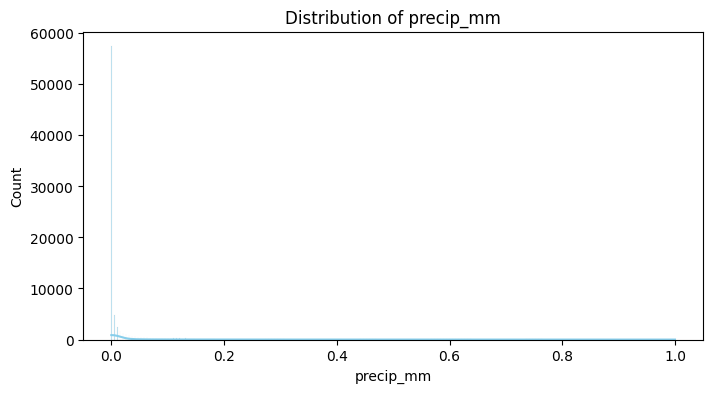

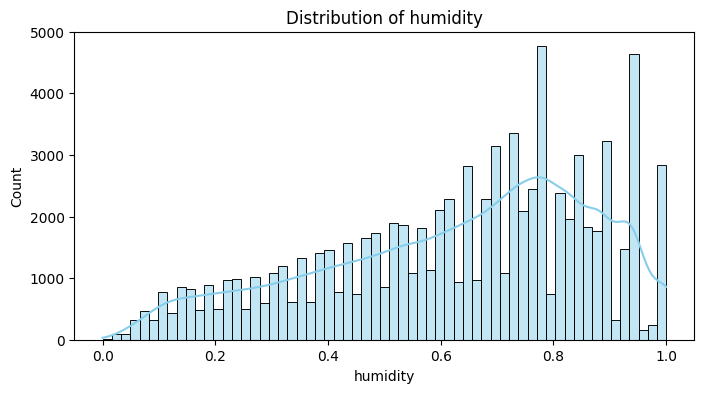

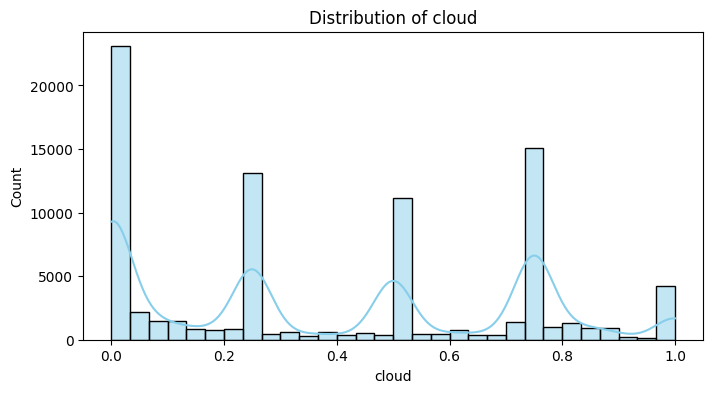

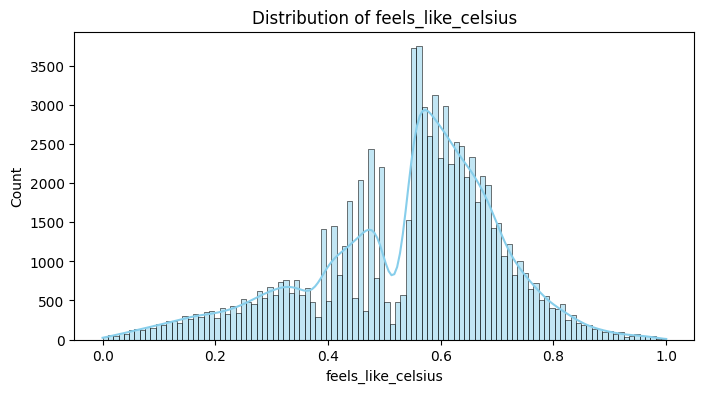

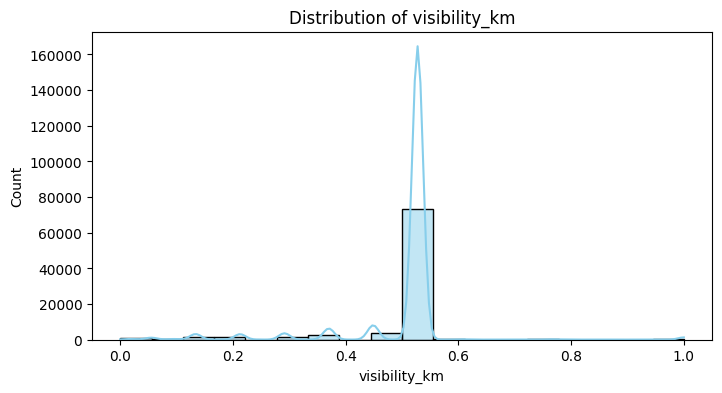

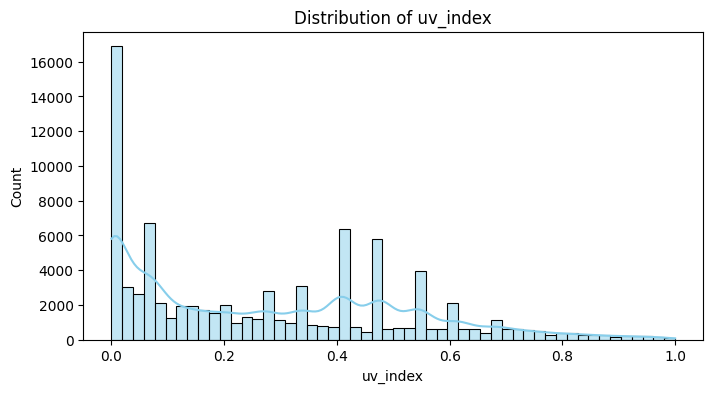

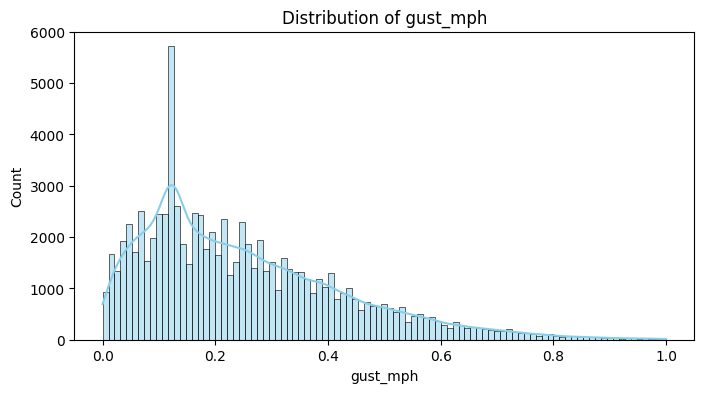

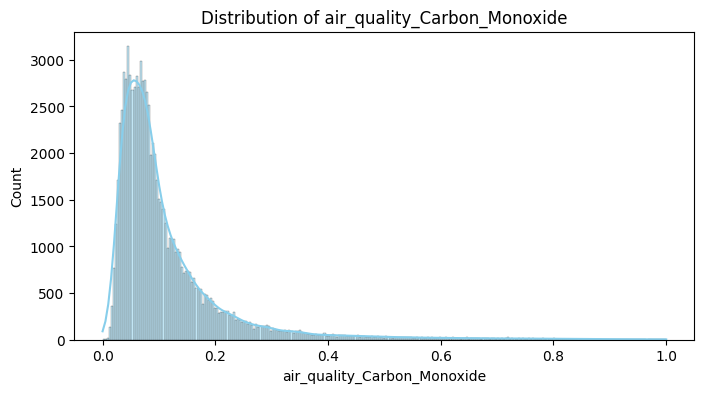

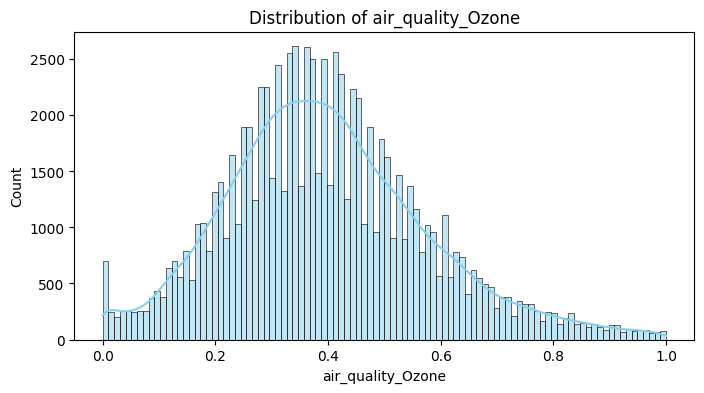

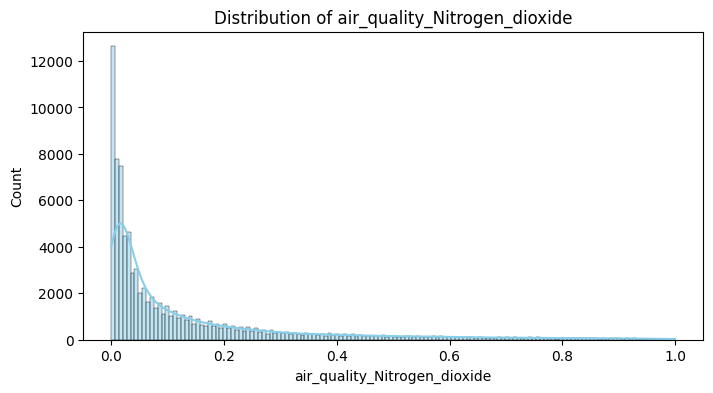

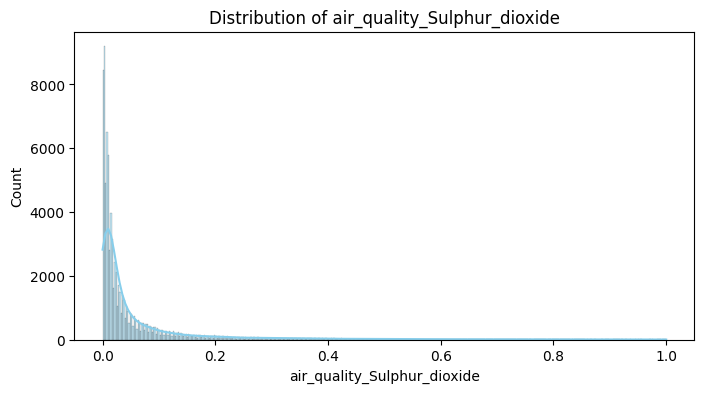

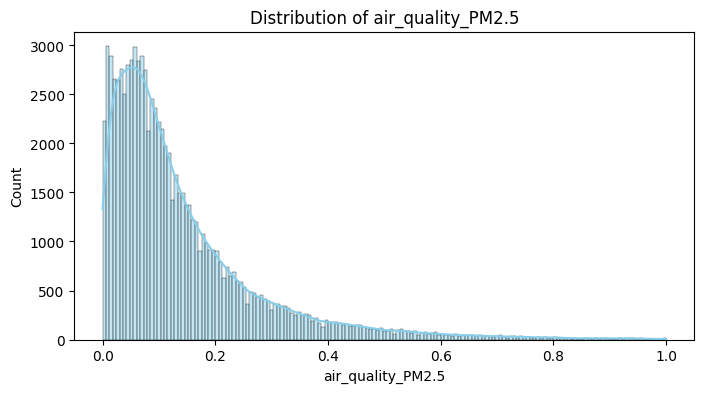

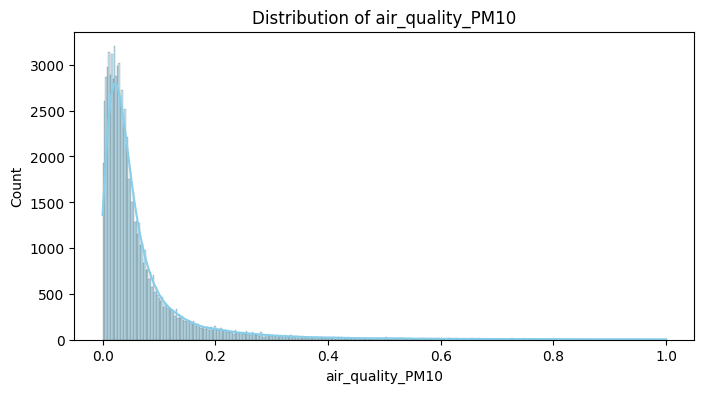

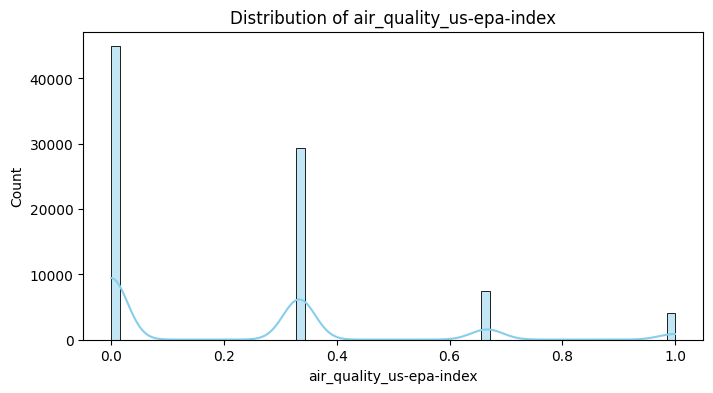

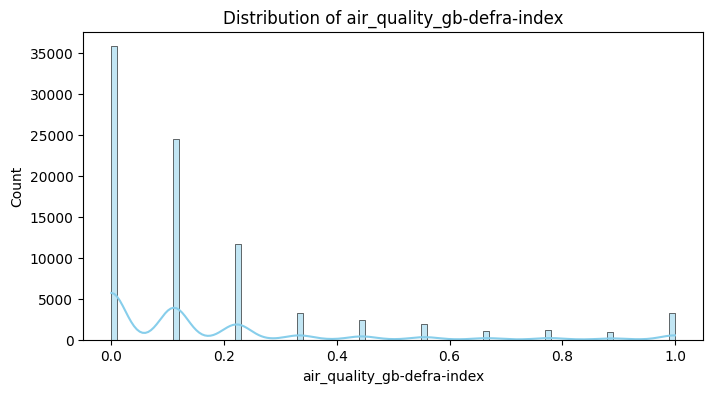

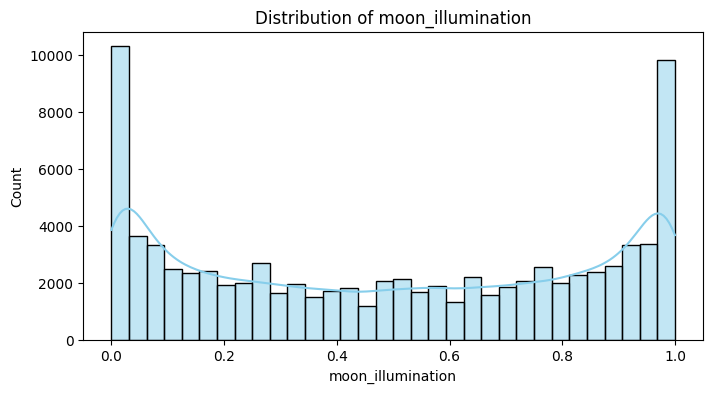

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load normalized weather data
df = pd.read_csv('../data/processed/normalized_weather_data.csv', parse_dates=['last_updated'])

# Select numeric columns
numeric_cols = [
    'temperature_celsius', 'wind_mph', 'wind_degree', 'pressure_mb', 'precip_mm', 
    'humidity', 'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_mph', 
    'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
    'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
    'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'moon_illumination'
]

# Plot histograms
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


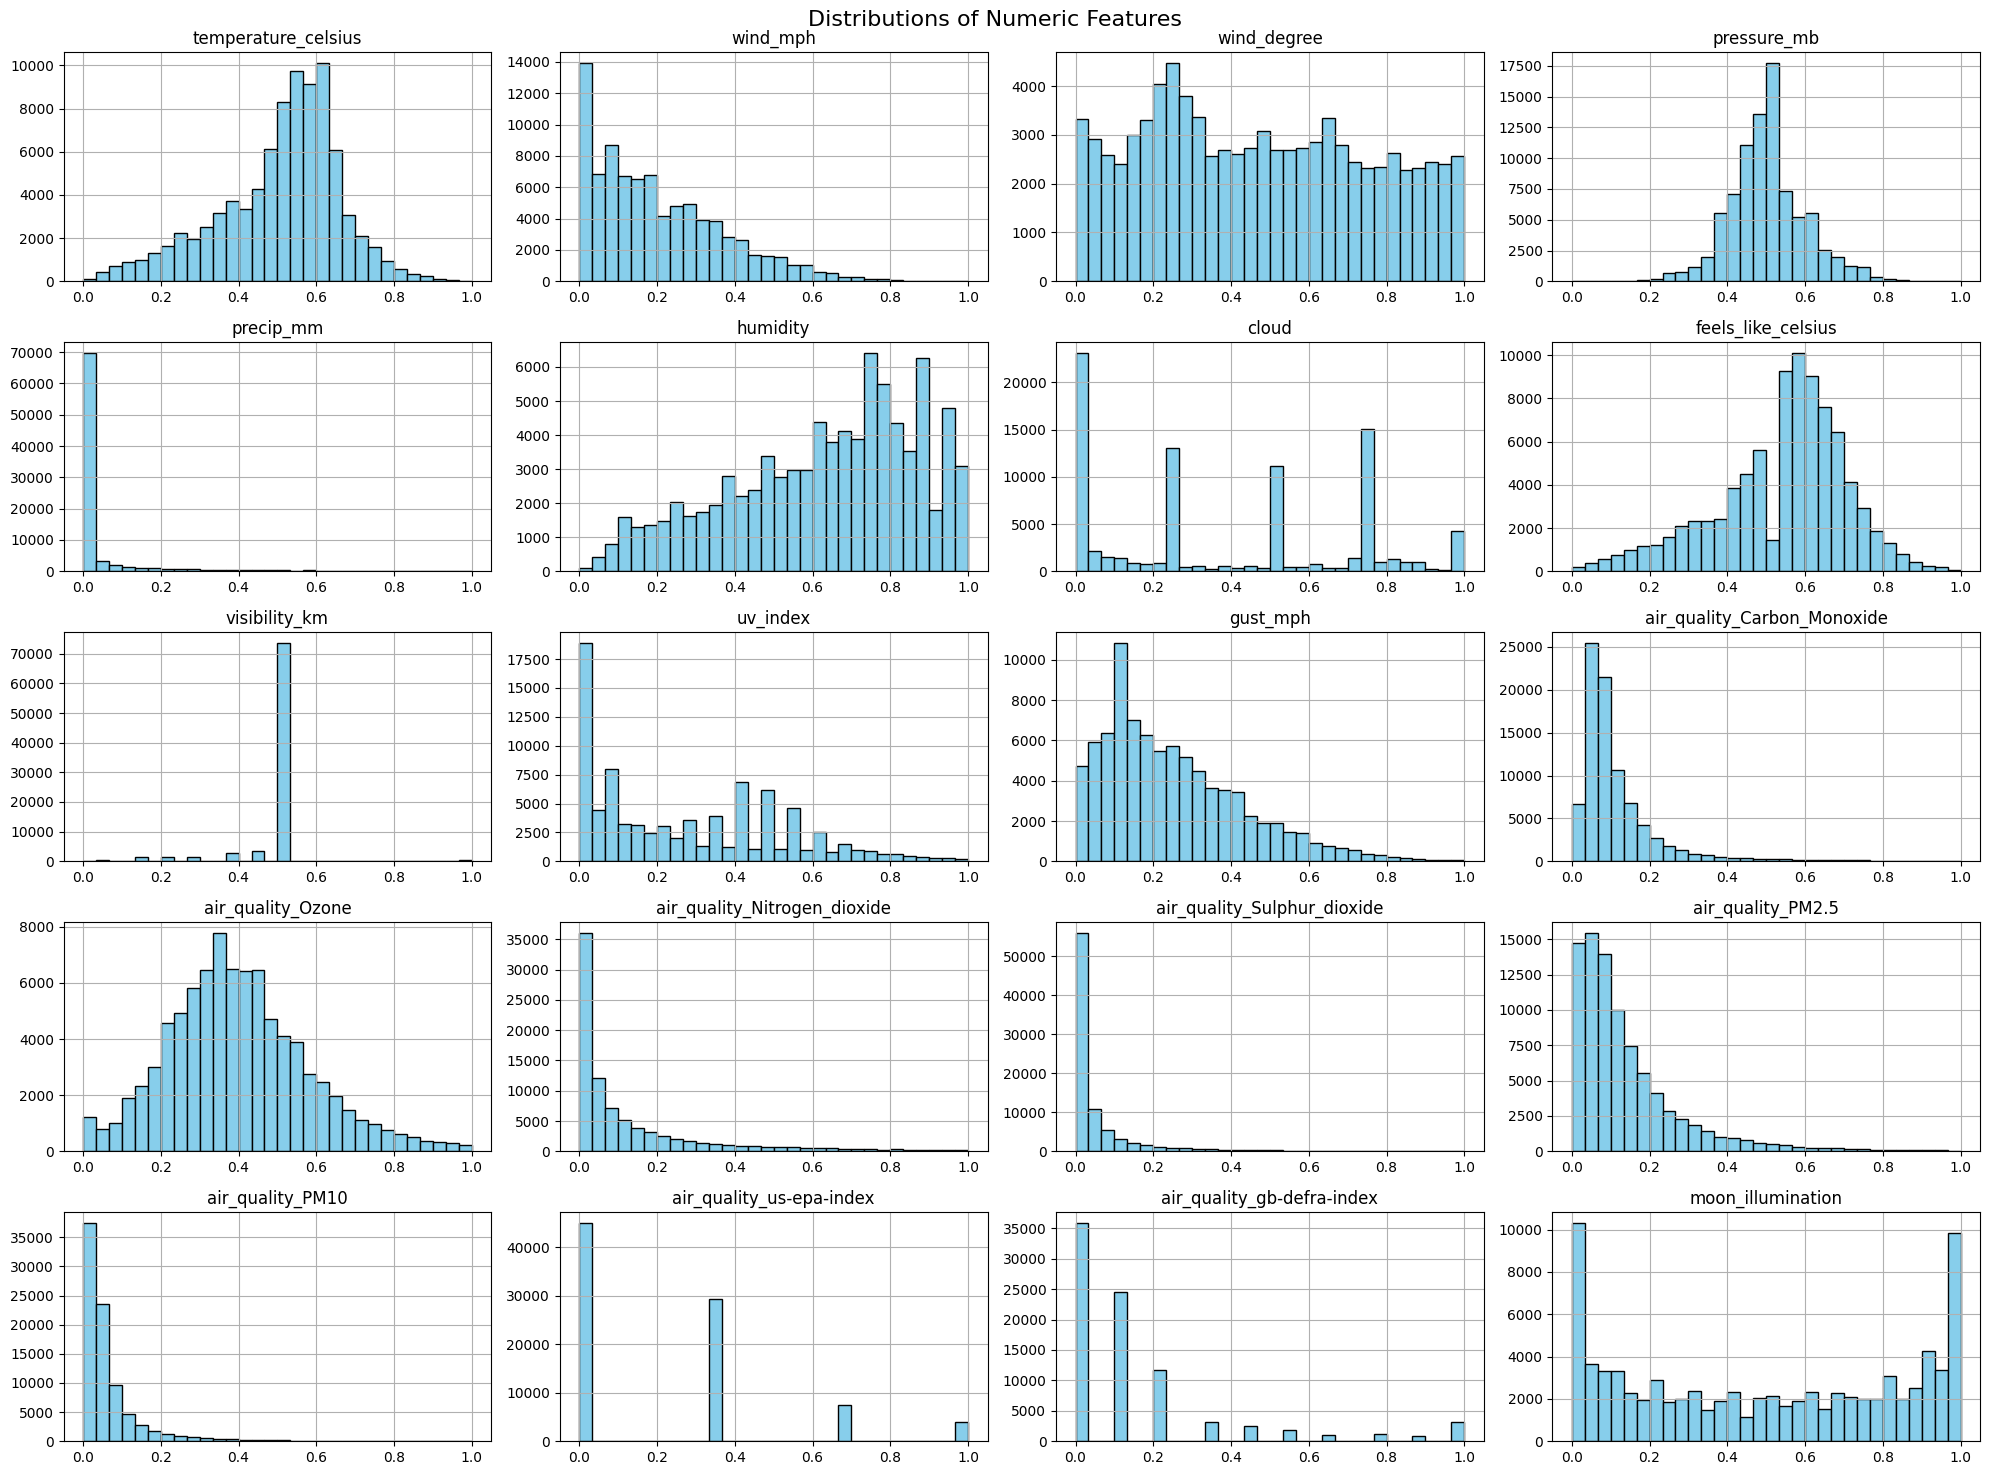

In [3]:
# Plot all histograms in one figure
df[numeric_cols].hist(bins=30, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle("Distributions of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


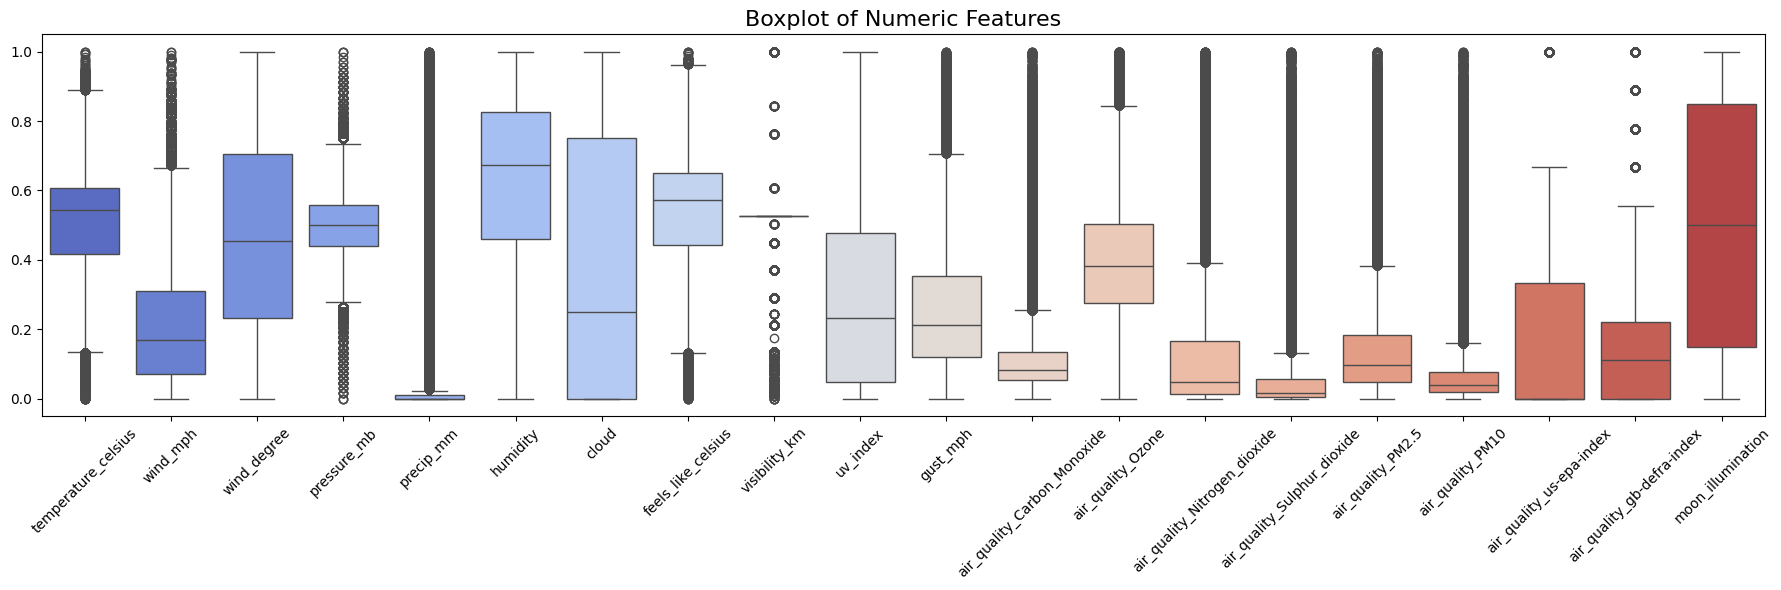

In [4]:
# Boxplot for spread and outliers
plt.figure(figsize=(18, 6))
sns.boxplot(data=df[numeric_cols], palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Boxplot of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


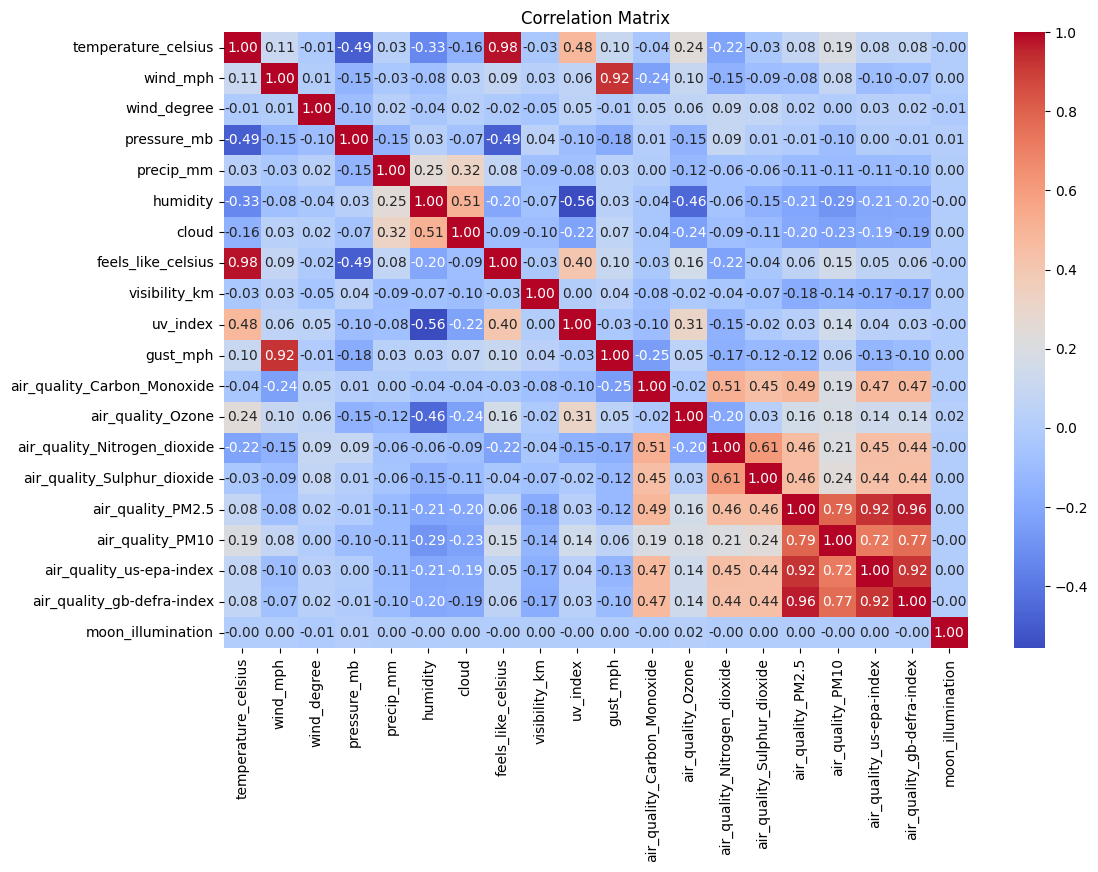

In [5]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Trends over time

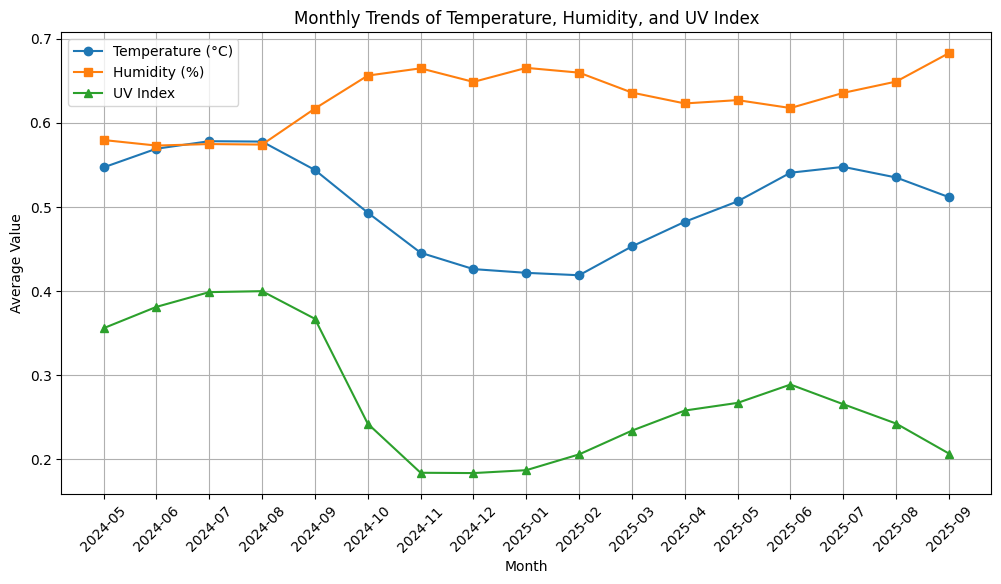

In [6]:
# Extract month and year
df['month'] = df['last_updated'].dt.to_period('M')

# Monthly average temperature, humidity, uv_index
monthly_trends = df.groupby('month')[['temperature_celsius', 'humidity', 'uv_index']].mean().reset_index()

# Plot trends
plt.figure(figsize=(12,6))
plt.plot(monthly_trends['month'].astype(str), monthly_trends['temperature_celsius'], marker='o', label='Temperature (°C)')
plt.plot(monthly_trends['month'].astype(str), monthly_trends['humidity'], marker='s', label='Humidity (%)')
plt.plot(monthly_trends['month'].astype(str), monthly_trends['uv_index'], marker='^', label='UV Index')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.title('Monthly Trends of Temperature, Humidity, and UV Index')
plt.legend()
plt.grid(True)
plt.show()

### Seasonal patterns

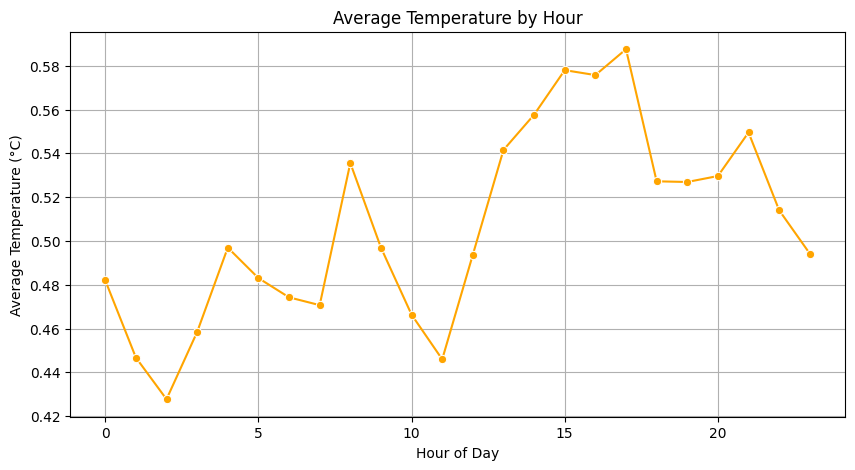

C:\Users\devar\AppData\Local\Temp\ipykernel_28256\510790867.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_temp.index, y=weekly_temp.values, palette='coolwarm')


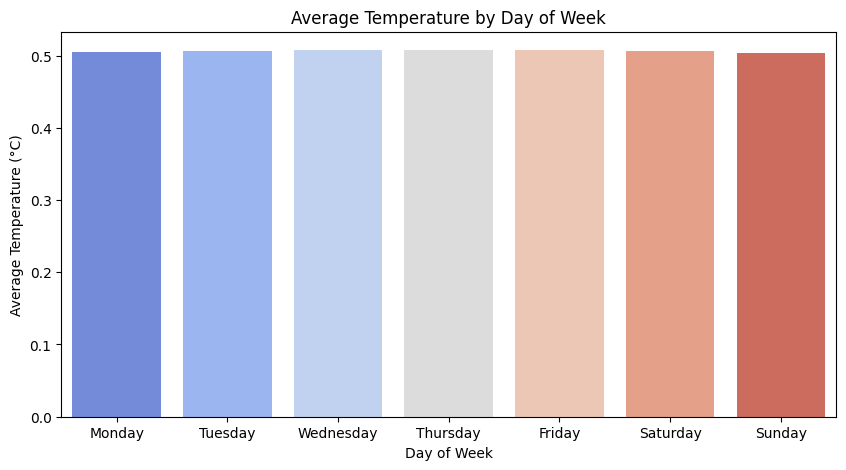

In [7]:
# Extract hour and day of week
df['hour'] = df['last_updated'].dt.hour
df['day_of_week'] = df['last_updated'].dt.day_name()

# Hourly average temperature
hourly_temp = df.groupby('hour')['temperature_celsius'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_temp.index, y=hourly_temp.values, marker='o', color='orange')
plt.xlabel('Hour of Day')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature by Hour')
plt.grid(True)
plt.show()

# Weekly average temperature
weekly_temp = df.groupby('day_of_week')['temperature_celsius'].mean()
weekly_temp = weekly_temp.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.figure(figsize=(10,5))
sns.barplot(x=weekly_temp.index, y=weekly_temp.values, palette='coolwarm')
plt.xlabel('Day of Week')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature by Day of Week')
plt.show()

## Identify Extreme Weather Events

In [8]:
import numpy as np

# Define key variables
extreme_cols = ['temperature_celsius', 'precip_mm', 'wind_mph', 'uv_index', 'humidity']

# Compute thresholds
thresholds = {}
for col in extreme_cols:
    upper = np.percentile(df[col], 95)
    lower = np.percentile(df[col], 5)
    thresholds[col] = {'lower': lower, 'upper': upper}

# Identify extremes
extreme_events = df.copy()
for col in extreme_cols:
    extreme_events = extreme_events[
        (df[col] >= thresholds[col]['upper']) | (df[col] <= thresholds[col]['lower'])
    ]

print("Extreme Event Thresholds:")
for col, val in thresholds.items():
    print(f"{col}: lower={val['lower']:.2f}, upper={val['upper']:.2f}")

print("\nExtreme Weather Records Detected:", extreme_events.shape[0])
extreme_events.head()

Extreme Event Thresholds:
temperature_celsius: lower=0.19, upper=0.72
precip_mm: lower=0.00, upper=0.34
wind_mph: lower=0.00, upper=0.53
uv_index: lower=0.00, upper=0.71
humidity: lower=0.17, upper=0.94

Extreme Weather Records Detected: 61


C:\Users\devar\AppData\Local\Temp\ipykernel_28256\2553870211.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  extreme_events = extreme_events[
C:\Users\devar\AppData\Local\Temp\ipykernel_28256\2553870211.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  extreme_events = extreme_events[
C:\Users\devar\AppData\Local\Temp\ipykernel_28256\2553870211.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  extreme_events = extreme_events[
C:\Users\devar\AppData\Local\Temp\ipykernel_28256\2553870211.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  extreme_events = extreme_events[


,temperature_celsius,wind_mph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,...,air_quality_gb-defra-index,moon_illumination,condition_text,wind_direction,moon_phase,last_updated,country,month,hour,day_of_week
5761,0.950943,0.560811,0.835655,0.294118,0.0,0.051020,0.00,0.956007,0.527559,0.748299,...,0.111111,0.67,sunny,WNW,Waxing Gibbous,2024-06-16 16:45:00,Iraq,2024-06,16,Sunday
6103,0.966038,0.614865,0.883008,0.308824,0.0,0.030612,0.14,0.969543,0.527559,0.748299,...,0.111111,0.83,sunny,NW,Waxing Gibbous,2024-06-18 17:00:00,Iraq,2024-06,17,Tuesday
6269,0.973585,0.604730,0.933148,0.294118,0.0,0.030612,0.00,0.976311,0.527559,0.748299,...,0.111111,0.90,sunny,NNW,Waxing Gibbous,2024-06-19 16:45:00,Iraq,2024-06,16,Wednesday
12130,0.932075,0.604730,0.813370,0.161765,0.0,0.091837,0.02,0.962775,0.527559,0.748299,...,0.222222,0.83,sunny,WNW,Waning Gibbous,2024-07-25 15:15:00,Iraq,2024-07,15,Thursday
15911,0.962264,0.000000,0.810585,0.235294,0.0,0.081633,0.00,0.966159,0.527559,0.748299,...,0.111111,0.82,sunny,WNW,Waxing Gibbous,2024-08-16 15:15:00,Iraq,2024-08,15,Friday


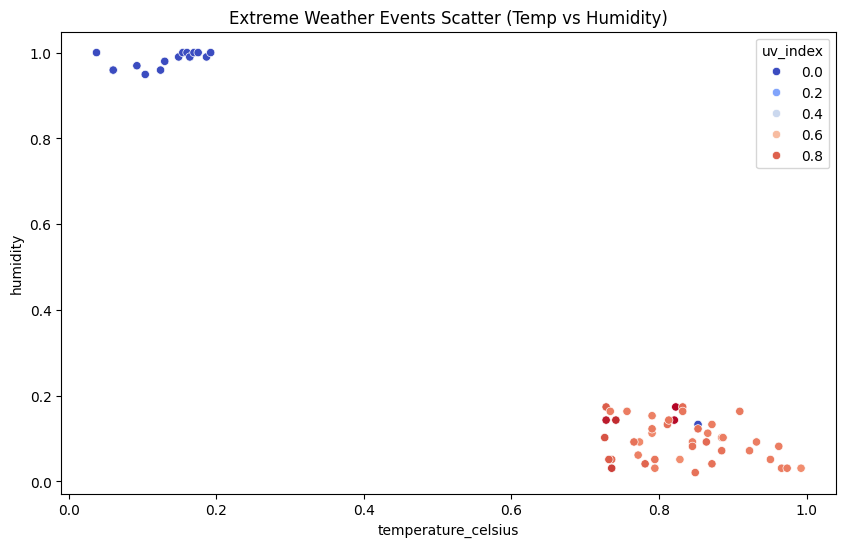

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=extreme_events, x='temperature_celsius', y='humidity', hue='uv_index', palette='coolwarm')
plt.title('Extreme Weather Events Scatter (Temp vs Humidity)')
plt.show()

## Compare Weather Conditions Across Regions

C:\Users\devar\AppData\Local\Temp\ipykernel_28256\1758687161.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='temperature_celsius', y='country', data=region_top_temp, palette='Reds_r')


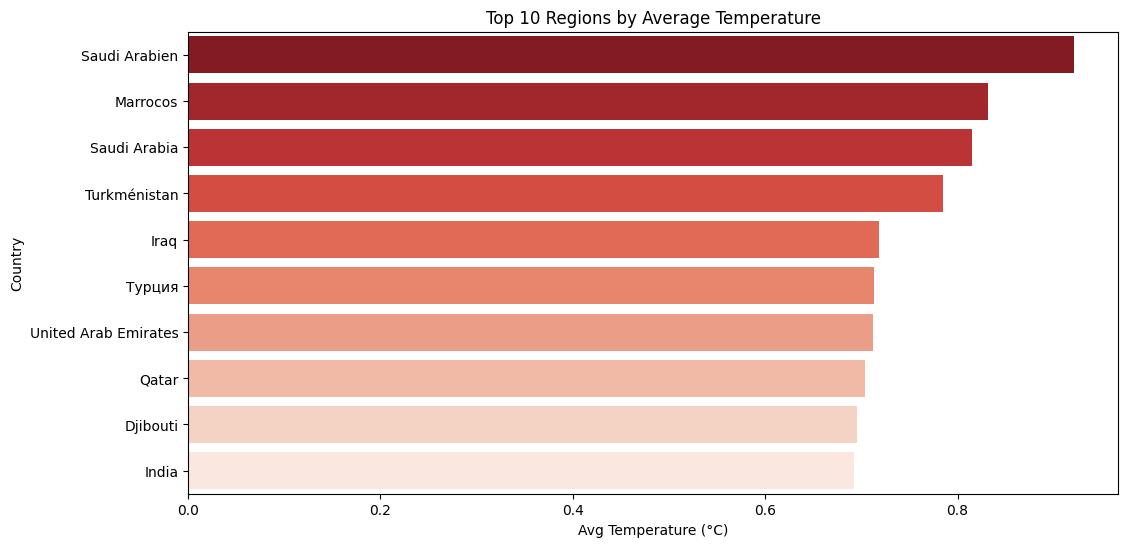

In [10]:
# Average temperature & humidity by country
region_stats = df.groupby('country')[['temperature_celsius', 'humidity', 'uv_index']].mean().reset_index()

# Sort top 10 hottest countries
region_top_temp = region_stats.sort_values(by='temperature_celsius', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='temperature_celsius', y='country', data=region_top_temp, palette='Reds_r')
plt.title('Top 10 Regions by Average Temperature')
plt.xlabel('Avg Temperature (°C)')
plt.ylabel('Country')
plt.show()

In [11]:
import plotly.express as px

fig = px.choropleth(
    region_stats,
    locations='country',
    locationmode='country names',
    color='temperature_celsius',
    hover_name='country',
    color_continuous_scale='RdYlBu_r',
    title='Average Temperature by Country'
)
fig.show()

C:\Users\devar\AppData\Local\Temp\ipykernel_28256\1506479111.py:3: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth(
